## Research on IMDB data from 2006 to 2016
### Dataset link : https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data
### Importing libraries and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

csv_path = 'C:\\Users\\arosl\\Downloads\\IMDB-Movie-Data.csv'

data = pd.read_csv(csv_path)

### 1. Display Top 10 rows of the dataset

In [3]:
data.head(10) #first 10

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


###  2. Find out how many rows and columns in our dataset

In [4]:
print(data.shape[0]) # num rows
print(data.shape[1]) # num columns

1000
12


### 3. Find out general info about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 4. Discovering missing values

In [6]:
print("Does our dataset containg null values? Answer :", data.isnull().values.any()) # check if we have missing values

missing_values = data.isnull().sum() # how many missing values each column has
print(missing_values,"\n")
print("Percentage of missing values in each column","\n",missing_values  * 100 / len(data))

Does our dataset containg null values? Answer : True
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64 

Percentage of missing values in each column 
 Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


### 5. Drop rows which contain missing values

In [30]:
data.dropna(inplace=True)

### 6. Discovering duplicated data

In [50]:
data.duplicated().sum() # as we see there is no duplicates in our data

0

###  7. Get overall statistic of numeric columns

In [49]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


### 8. Display Title of movie which runtime is longer than 175 minutes

In [48]:
filt = (data['Runtime (Minutes)']>=175)
data[filt]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

### 9. Which year has biggest average votes

In [63]:
year_grp = data.groupby('Year')
avg_votes_by_year = year_grp['Votes'].mean().to_frame()
avg_votes_by_year.nlargest(1,'Votes')


,Votes
Year,
2012,290861.483871


### 10. Year with the highest revenue

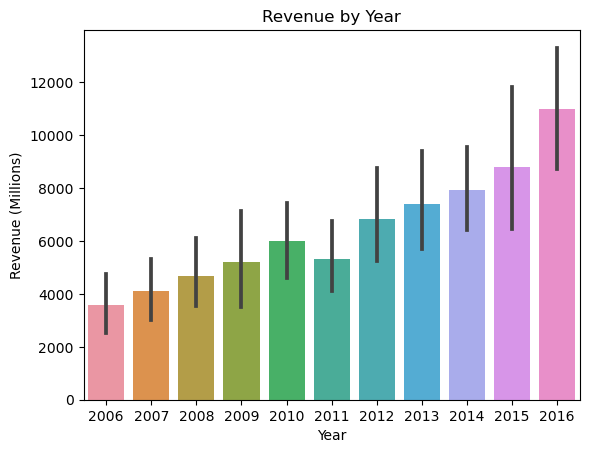

In [111]:
sns.barplot(x='Year',y='Revenue (Millions)',data = data,estimator=sum)
plt.title('Revenue by Year')
plt.show()
## As we see 2016 has the highest revenue

### 11. Display Top 10 Lengthy movies and their runtime

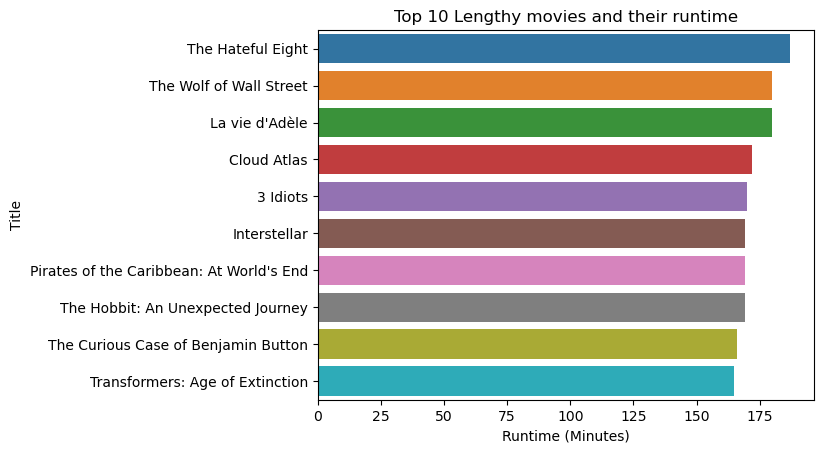

In [81]:
top10_len = data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')
sns.barplot(x='Runtime (Minutes)',y=top10_len.index,data=top10_len)
plt.title('Top 10 Lengthy movies and their runtime')
plt.show()

### 12. Display number of movies per year

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64


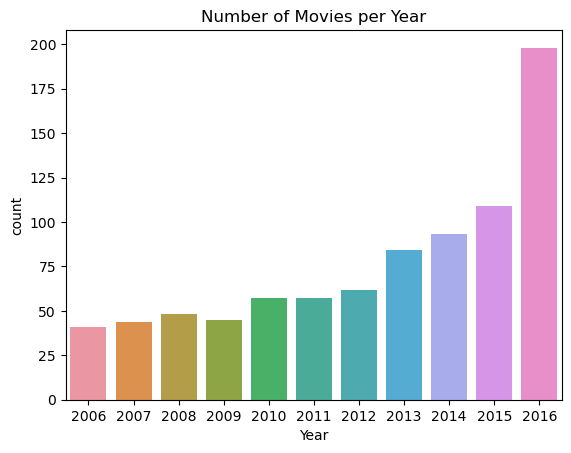

In [113]:
print(data['Year'].value_counts()) # in tabular format

sns.countplot(x='Year',data=data)
plt.title('Number of Movies per Year')
plt.show()




### 13. Find most popular movie Title

In [93]:
filt = (data['Revenue (Millions)'].max() == data['Revenue (Millions)'])
data[filt]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

### 14. Display Top 10 rated movie Titles and its directors 

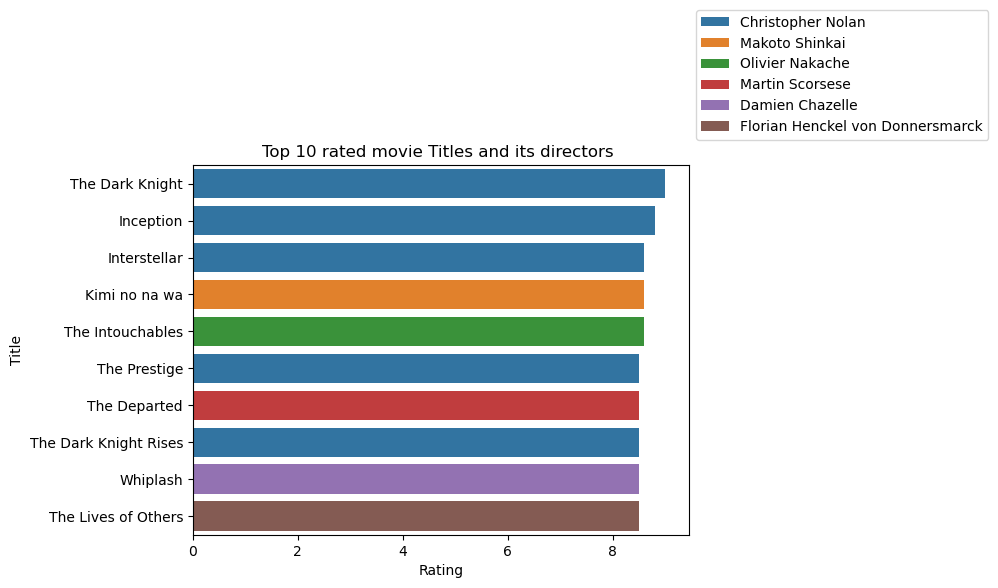

In [99]:
top_10 = data.nlargest(10,'Rating')[['Title','Director','Rating']].set_index('Title')
sns.barplot(x='Rating',y=top_10.index,data=top_10,hue = 'Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1.05))
plt.title('Top 10 rated movie Titles and its directors ')
plt.show()

### 15. Does rating affect the revenue ?

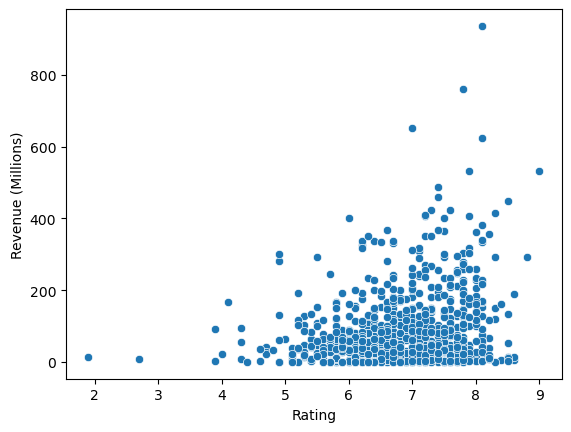

In [116]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data)
plt.show()
# After seeing our plot, we can say that there is a correlation between these 2 columns

### 16. Add a new column (classification based on rating)
#### Rating can be from 0 to 10. If < 5 then 'Average', if >= 5, then 'Good', if >=7.5, then 'Excelent'

In [123]:
def Ratings(rating):
    if rating >=7.5:
        return 'Excelent'
    elif rating >=5:
        return 'Good'
    else:
        return 'Average'

data['rating_cat'] = data['Rating'].apply(Ratings)
data.head() ## as we see the new column is added properly

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excelent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


### 17. Count number of Action movies
#### We need to work with column 'Genre', but it may contain different genre in one cell. So I will check if cell contains our value

In [143]:
print(data['Genre'].dtypes) # check if column has object type, so we can use str function
data['Genre'].str.contains('Action',case=False).sum()# Counts how many movies are action genre, also it ignores case sensetivity



object


277

### 18. Find unique values from Genre column

In [192]:
print(data['Genre'].head(),'\n') # As we see Genre column may contain differenct genres splitted by comma

list1 = []
for i in data['Genre']:
    list1.append(i.split(',')) # put values from dataframe to an empty list. The result is 2-d list

one_d  = []
for i in range(len(list1)):
   for j in range(len(list1[i])):
        one_d.append(list1[i][j]) # Transform our 2-d "list1" into 1-d list "one_d"
one_d_numpy = np.array(one_d)
unique_genres = np.unique(one_d_numpy) 
print('Array of unique genres:','\n',unique_genres.tolist(),'\n','Quantity of unique genres: ',unique_genres.size)





0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object 

Array of unique genres: 
 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'] 
 Quantity of unique genres:  20
